<a href="https://colab.research.google.com/github/tronschell/MGIS355FinalProject/blob/main/Project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/home/marketing_campaign.csv", delimiter="\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [ ]:
df_median = df["Income"].median()
df = df.fillna(value=df["Income"].median())

In [ ]:
total_purchases = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['total_purchases'] = total_purchases

In [ ]:
X = df[['Year_Birth', 'Education', 'Marital_Status', 'Income', 'total_purchases']]

In [ ]:
print(df.Marital_Status.unique())

[1 3 2 4 5 6 7]


We are going to encode our Categorical Education data.
Graduations = 1
PhD = 2
Master = 3
2n Cycle = 4
Basic = 5

In [ ]:
for i in df['Education']:
  if i == "Graduation":
    df['Education'] = df['Education'].replace("Graduation", 1)
  elif i == "PhD":
     df['Education'] =df['Education'].replace("PhD", 2)
  elif i == "Master":
    df['Education'] = df['Education'].replace("Master", 3)
  elif i == "2n Cycle":
     df['Education'] =df['Education'].replace("2n Cycle", 4)
  elif i == "Basic":
     df['Education'] =df['Education'].replace("Basic", 5)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,total_purchases
0,5524,1957,1,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,25
1,2174,1954,1,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,6
2,4141,1965,1,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,21
3,6182,1984,1,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,8
4,5324,1981,2,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,19


Next we are going to encode our Categorixal Marital Status data.
Single & Alone = 1
Married = 2
Together = 3
Divorced = 4
Widow = 5
Absurd = 6
YOLO = 7

In [ ]:
for p in df['Marital_Status']:
  if p == "Single":
    df['Marital_Status'] = df['Marital_Status'].replace('Single', 1)
  elif p == "Alone":
    df['Marital_Status'] = df['Marital_Status'].replace('Alone', 1)
  elif p == "Married":
    df['Marital_Status'] = df['Marital_Status'].replace('Married', 2)
  elif p == "Together":
    df['Marital_Status'] = df['Marital_Status'].replace('Together', 3)
  elif p == "Divorced":
    df['Marital_Status'] = df['Marital_Status'].replace('Divorced', 4)
  elif p == "Widow":
    df['Marital_Status'] = df['Marital_Status'].replace('Widow', 5)
  elif p == "Absurd":
    df['Marital_Status'] = df['Marital_Status'].replace('Absurd', 6)
  elif p == "YOLO":
    df['Marital_Status'] = df['Marital_Status'].replace('YOLO', 7)
X.head()

,Year_Birth,Education,Marital_Status,Income,total_purchases
0,1957,1,1,58138.0,25
1,1954,1,1,46344.0,6
2,1965,1,3,71613.0,21
3,1984,1,3,26646.0,8
4,1981,2,2,58293.0,19


We're going to split the X dataset into 4 different datasets all based on the amount of purchases. However, we will split them based on certain features.

When we run the KMeans algorithm, it will give us the clusters based on one feature of each dataframe making it easier to interperate, visualize, and describe.

In [ ]:
birth_df = X[['Year_Birth', 'total_purchases']]
edu_df = X[['Education', 'total_purchases']]
ms_df = X[['Marital_Status', 'total_purchases']]
income_df = X[['Income', 'total_purchases']]

In [ ]:
def KMeans_Algorithm(dataset):
    clustering_KMeans = KMeans(n_clusters =6,init='k-means++', max_iter=300, random_state=0, algorithm = "elkan")
    clustering_KMeans.fit(dataset)
    
    # create data frame to store centroids
    centroids  = clustering_KMeans.cluster_centers_
    centroids_df = pd.DataFrame(centroids, columns = ['X', 'Y'])
    
    # add cluster label for each data point
    label = clustering_KMeans.labels_
    df["label"] = label

    return label, centroids_df

Text(0, 0.5, 'Total Purchases')

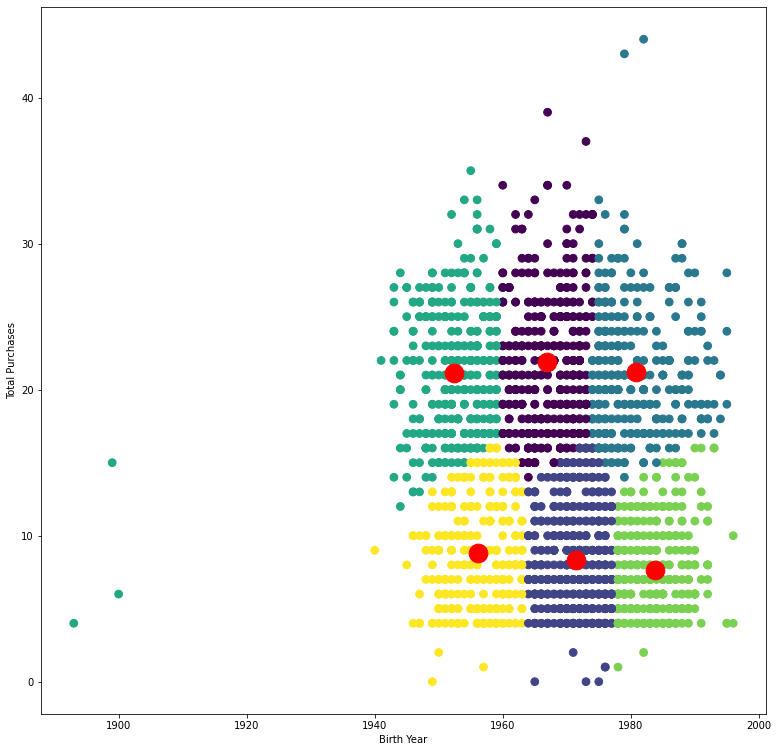

In [ ]:
birth_label, birth_centroids = KMeans_Algorithm(birth_df)
fig1 = plt.figure(figsize=(13, 13))
plt.scatter(birth_df["Year_Birth"], birth_df["total_purchases"], s=60, c=df["label"],)
plt.scatter(birth_centroids["X"], birth_centroids["Y"], s=350, c="r")
plt.xlabel('Birth Year')
plt.ylabel('Total Purchases')

Text(0, 0.5, 'Total Purchases')

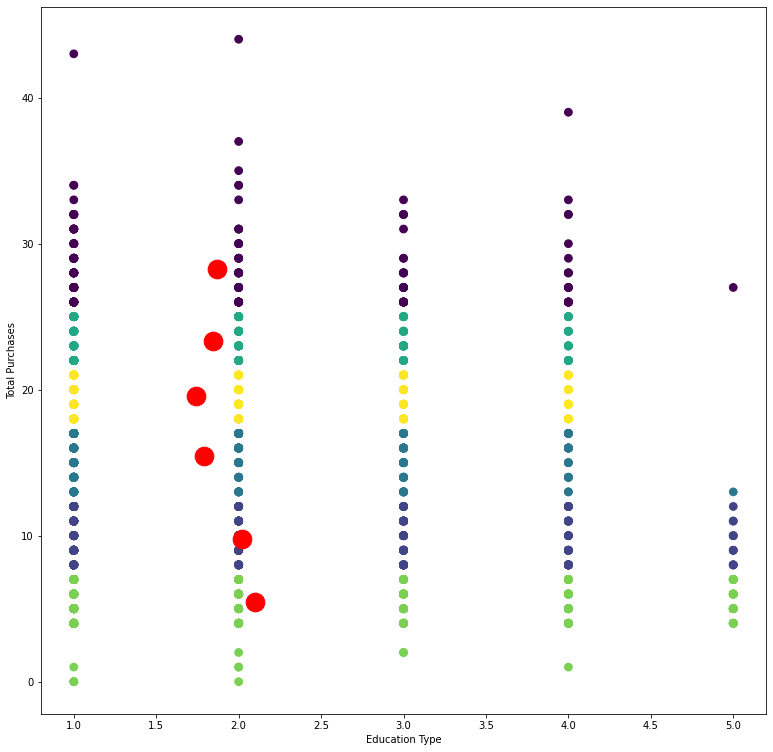

In [ ]:
edu_label, edu_centroids = KMeans_Algorithm(edu_df)
fig1 = plt.figure(figsize=(13, 13))
plt.scatter(edu_df["Education"], edu_df["total_purchases"], s=60, c=df["label"])
plt.scatter(edu_centroids["X"], edu_centroids["Y"], s=350, c="r")
plt.xlabel('Education Type')
plt.ylabel('Total Purchases')

Text(0, 0.5, 'Total Purchases')

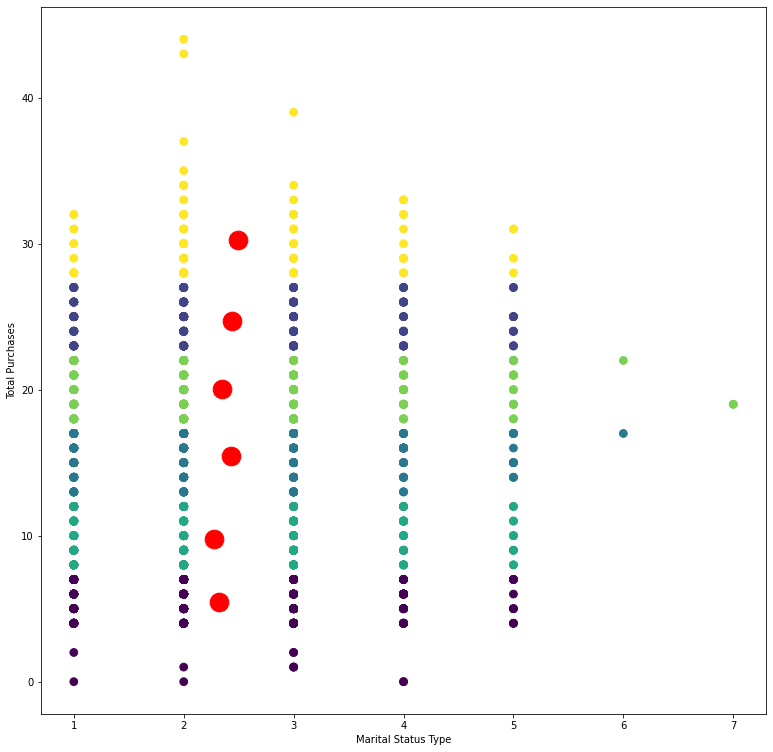

In [ ]:
ms_label, ms_centroids = KMeans_Algorithm(ms_df)
fig1 = plt.figure(figsize=(13, 13))
plt.scatter(ms_df["Marital_Status"], ms_df["total_purchases"], s=60, c=df["label"])
plt.scatter(ms_centroids["X"], ms_centroids["Y"], s=350, c="r")
plt.xlabel('Marital Status Type')
plt.ylabel('Total Purchases')

Text(0, 0.5, 'Total Purchases')

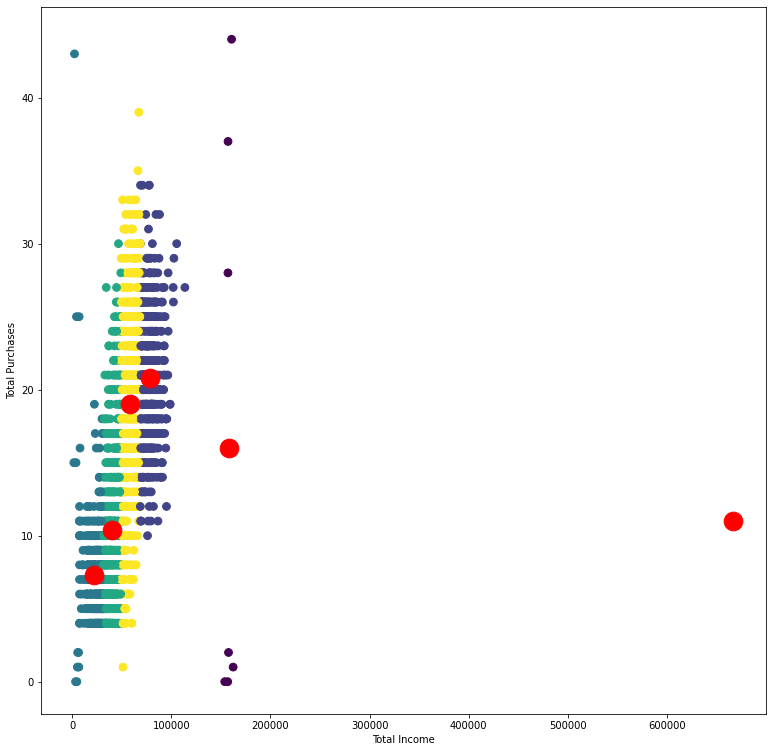

In [ ]:
income_label, income_centroids = KMeans_Algorithm(income_df)
fig1 = plt.figure(figsize=(13, 13))
plt.scatter(income_df["Income"], income_df["total_purchases"], s=60, c=df["label"])
plt.scatter(income_centroids["X"], income_centroids["Y"], s=350, c="r")
plt.xlabel('Total Income')
plt.ylabel('Total Purchases')       